In [1]:
#Open source dataset - evictions in New York from 2017 to present 
#Source: https://data.cityofnewyork.us/City-Government/Evictions/6z8x-wfk4
#(JSON: https://data.cityofnewyork.us/resource/6z8x-wfk4.json?$limit=100000)

In [79]:
##########################################
#Step 0: Import libraries
##########################################
import requests
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
#import geopandas as gpd
import seaborn as sns
from sqlalchemy import create_engine

In [15]:
##########################################
#Step 1: Import data
##########################################

#Data is of evictions in New York from 2017 to present
#Source: https://data.cityofnewyork.us/City-Government/Evictions/6z8x-wfk4

In [16]:
#Set limit to 100,000 to capture all entries in 
NY_Evictions_gross = pd.read_json(r'https://data.cityofnewyork.us/resource/6z8x-wfk4.json?$limit=100000')

In [17]:
##########################################
#Step 2: Describe data
##########################################

In [21]:
print(NY_Evictions_gross.columns)

Index(['court_index_number', 'docket_number', 'eviction_address',
       'eviction_apt_num', 'executed_date', 'marshal_first_name',
       'marshal_last_name', 'residential_commercial_ind', 'borough',
       'eviction_zip', 'ejectment', 'eviction_possession', 'latitude',
       'longitude', 'community_board', 'council_district', 'census_tract',
       'bin', 'bbl', 'nta'],
      dtype='object')


In [19]:
NY_Evictions = NY_Evictions_gross
#[['court_index_number', 'docket_number', 'eviction_address',
 #      'eviction_apt_num', 'executed_date', 'marshal_first_name',
  #     'marshal_last_name', 'residential_commercial_ind', 'borough',
   #    'eviction_zip', 'ejectment', 'eviction_possession', 'community_board', 'council_district', 'census_tract',
    #   'bin', 'bbl', 'nta']]

In [8]:
print(NY_Evictions.head())

  court_index_number  docket_number       eviction_address eviction_apt_num  \
0            8029/18         343313  220 WEST 167TH STREET              2-B   
1           74409/18          22777   145-02 ROCKAWAY BLVD              NaN   
2           33073/18           3964     1950 BRYANT AVENUE         BASEMENT   
3           85137/17          76574      319 ELLERY STREET               3L   
4          58266/17B         475956     318-320 E. 151 ST.               1C   

             executed_date marshal_first_name marshal_last_name  \
0  2018-11-26T00:00:00.000             Thomas               Bia   
1  2019-05-28T00:00:00.000             Edward             Guida   
2  2019-02-21T00:00:00.000              Vadim       Barbarovich   
3  2018-01-03T00:00:00.000              Henry             Daley   
4  2018-01-17T00:00:00.000              Danny          Weinheim   

  residential_commercial_ind   borough  eviction_zip         ejectment  \
0                Residential     BRONX         1

In [22]:
print(NY_Evictions.describe())

       docket_number  eviction_zip      latitude     longitude  \
count   70166.000000  70166.000000  63418.000000  63418.000000   
mean   152621.121455  10794.114642     40.751723    -73.908298   
std    147196.950665    519.241108      0.091144      0.068419   
min         1.000000      0.000000     40.499050    -74.251262   
25%     60322.750000  10454.000000     40.672157    -73.945088   
50%     92436.000000  10473.000000     40.752391    -73.910000   
75%    288142.750000  11229.000000     40.836407    -73.871685   
max    496987.000000  12221.000000     40.911588    -73.701430   

       community_board  council_district   census_tract           bin  \
count     63418.000000      63418.000000   63418.000000  6.329000e+04   
mean          8.002618         23.821991    8426.561686  2.705794e+06   
std           4.576517         13.755295   21546.774078  1.116501e+06   
min           1.000000          1.000000       1.000000  1.000000e+06   
25%           4.000000         13.000000

In [98]:
#for y in NY_Evictions.executed_date:
day, month, year = NY_Evictions['executed_date'].split('-')
print(year)
#NY_Evictions['executed_year']=NY_Evictions['executed_date'].max()
#print(NY_Evictions[['executed_date','executed_year']])

AttributeError: 'Series' object has no attribute 'split'

In [11]:
##########################################
#Step 3: Clean data
##########################################

In [67]:
print(NY_Evictions['executed_date'].dtype
#NY_Evictions['timestamp']= pd.to_datetime(NY_Evictions['executed_date'], format='%d%b%Y:%H:%M:%S.%f')
print(NY_Evictions.head())

SyntaxError: invalid syntax (743497562.py, line 1)

In [60]:
##########################################
#Step 4: Manipulate data
##########################################
evictions_by_borough = NY_Evictions.pivot_table(values='docket_number',index='borough', columns = 'council_district',aggfunc='count',)
print(evictions_by_borough)


council_district   1.0    2.0     3.0    4.0    5.0    6.0     7.0     8.0   \
borough                                                                       
BRONX               NaN    NaN     NaN    NaN    NaN    NaN     NaN  1383.0   
BROOKLYN            NaN    NaN     NaN    NaN    NaN    NaN     NaN     NaN   
MANHATTAN         629.0  691.0  1395.0  660.0  590.0  461.0  1038.0   732.0   
QUEENS              NaN    NaN     NaN    NaN    NaN    NaN     NaN     NaN   
STATEN ISLAND       NaN    NaN     NaN    NaN    NaN    NaN     NaN     NaN   

council_district    9.0     10.0  ...    42.0   43.0   44.0    45.0   46.0  \
borough                           ...                                        
BRONX                2.0    10.0  ...     NaN    NaN    NaN     NaN    NaN   
BROOKLYN             NaN     NaN  ...  2291.0  684.0  444.0  1619.0  974.0   
MANHATTAN         2068.0  1589.0  ...     NaN    NaN    NaN     NaN    NaN   
QUEENS               NaN     NaN  ...     NaN    NaN    

In [13]:
##########################################
#Step 5: Graph data
##########################################

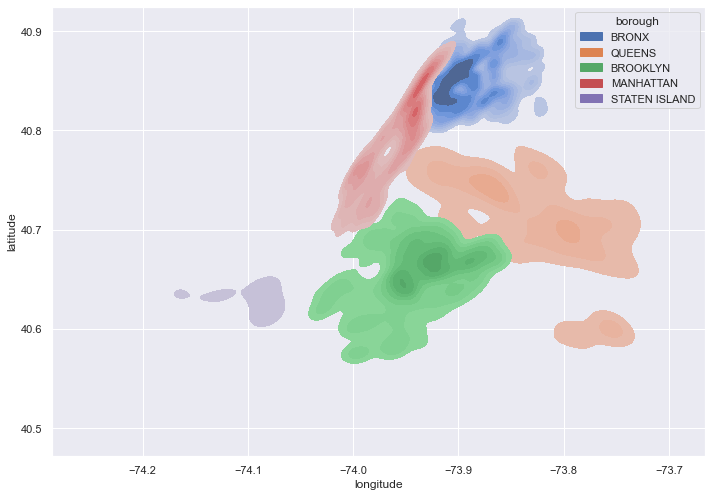

In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(x='longitude',y='latitude',data=NY_Evictions,hue='borough',fill=True)
plt.show()